In [1]:
!pip install scipy

In [2]:
!pip install researchpy # combines pandas, scipy.stats and statsmodel to get more complete info. in a single API call

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

ModuleNotFoundError: No module named 'reasearchpy'

In [4]:
import researchpy as rp
from scipy import stats

In [5]:
bike_data = pd.read_csv("datasets_130897_312329_day.csv")
bike_data.shape

(731, 16)

In [6]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike_sharing_data = bike_data[['season','mnth','holiday','workingday','weathersit','temp','cnt']]

In [9]:
bike_sharing_data['season'].unique() # 1: Spring, 2: Summer, 3:Fall, 4:Winter

array([1, 2, 3, 4], dtype=int64)

In [10]:
bike_sharing_data['weathersit'].unique()
# 1: clear,few clouds, 2:misty,cloudy, 3:lightsnow, thunderstorm, rain

array([2, 1, 3], dtype=int64)

In [13]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


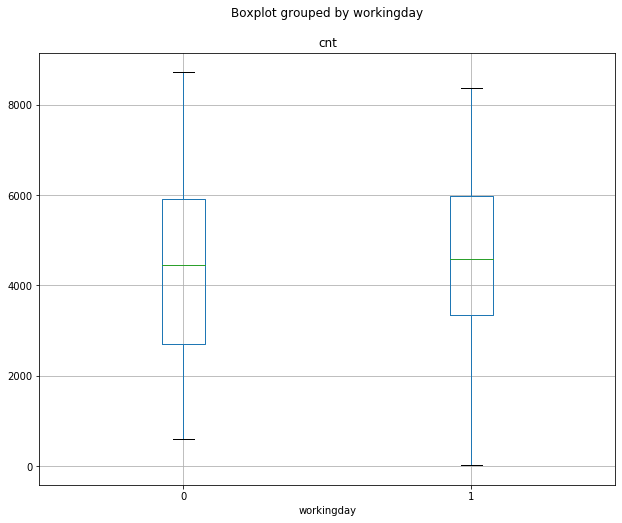

In [14]:
bike_sharing_data.boxplot(column=['cnt'],by='workingday',figsize=(10,8))

In [15]:
# data preparation for T-test
sample01 = bike_sharing_data[bike_sharing_data['workingday']==1] 
sample02 = bike_sharing_data[bike_sharing_data['workingday']==0]  

In [16]:
sample01.shape,sample02.shape

((500, 7), (231, 7))

In [17]:
# For T-test we need both the sample size to be the same
sample01 = sample01.sample(231)
sample01.shape,sample02.shape

((231, 7), (231, 7))

In [18]:
# Check whether assumptions made for T-test are satisfied
# Assumption1 : Leven's test to check whether the variance of two groups  are same, like for t-test
# but for variance rather than mean
stats.levene(sample01['cnt'],sample02['cnt'])

# Since p-value > 5% => Null Hypotheis holds true and assumption1 is saisfied

LeveneResult(statistic=3.574304729220887, pvalue=0.059308239968200734)

(array([ 1., 12., 26., 26., 36., 38., 34., 28., 21.,  9.]),
 array([-2.53369642, -2.0619865 , -1.59027657, -1.11856665, -0.64685672,
        -0.1751468 ,  0.29656313,  0.76827305,  1.23998298,  1.7116929 ,
         2.18340283]),
 <a list of 10 Patch objects>)

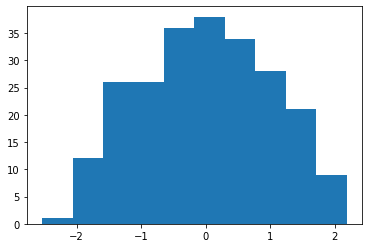

In [22]:
# Assumptions 2 : the distribution of the residuals btw the 2 groups should follow the normal distribution
diff = scale(np.array(sample01['cnt'])-np.array(sample02['cnt'],dtype=np.float))
plt.hist(diff)
# scale : 0 mean and unit variance => uses Zscore(no.of std. deviation from mean)

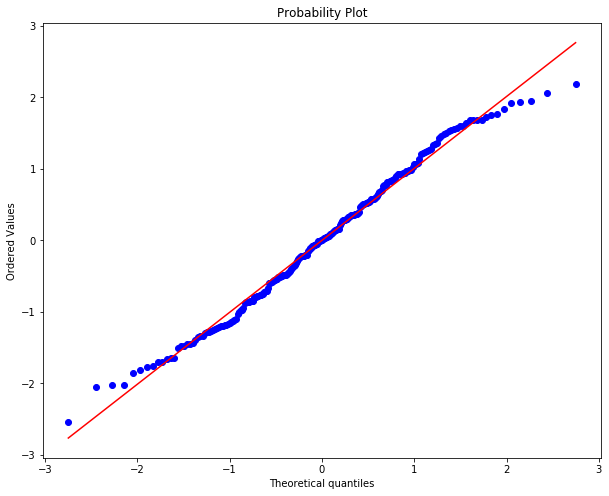

In [23]:
# Generates a probability plot of sample data against the quantiles of a theoretical distribution (normal distribution)
# check how residual distribution compare with normal distribution of data
plt.figure(figsize=(10,8))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

# Assumption 2 satisfied

In [24]:
# 3rd approach for assumption 2 : Shapiro-Wilk Test
stats.shapiro(diff)
# Shapiro-WIlk Test for normality : if the test statistic is not significant then population is normally distriuted
# since p-value is 5% => shapiro test is not significant => residual data is normally distributed

(0.9880737066268921, 0.051859866827726364)

In [25]:
# Independent T-test
stats.ttest_ind(sample01['cnt'],sample02['cnt'])
# since p-value ~ 17% =. we can reject alternative hypothesis and accept Null hypothesis (theres is no difference in 
# means between these 2 groups) => it is safe to  say that , with independent T-test that
#if it is working day or not it has no effect on the num_of bikes shared

Ttest_indResult(statistic=1.3768338736444954, pvalue=0.169233314024641)

In [27]:
descritives, result = rp.ttest(sample01['cnt'],sample02['cnt'])

In [29]:
descritives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4581.549784,1867.919276,122.900065,4339.395880,4823.703687
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4455.859307,1964.098666,91.378140,4276.290003,4635.428611


In [28]:
result

,Independent t-test,results
0,Difference (cnt - cnt) =,251.3810
1,Degrees of freedom =,460.0000
2,t =,1.3768
3,Two side test p value =,0.1692
4,Difference < 0 p value =,0.9154
5,Difference > 0 p value =,0.0846
6,Cohen's d =,0.1281
7,Hedge's g =,0.1279
8,Glass's delta =,0.1346
9,r =,0.0641


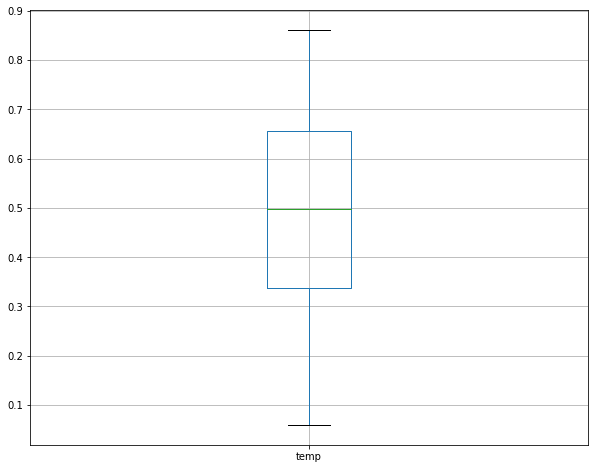

In [32]:
# lets check for temperature
bike_sharing_data[['temp']].boxplot(figsize=(10,8))

In [33]:
# 2 categories on continuous temp data
bike_sharing_data['temp_category'] = bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()
bike_sharing_data.sample(3)

C:\Users\A734917\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
511,2,5,0,0,1,0.692500,6536,True
585,3,8,0,1,2,0.750000,7534,True
344,4,12,0,0,1,0.220833,2743,False


In [36]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


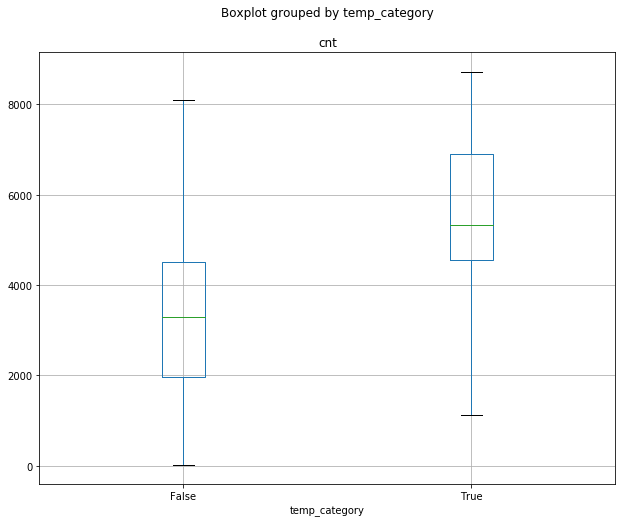

In [37]:
bike_sharing_data.boxplot(column='cnt',by='temp_category',figsize=(10,8))

In [38]:
sam01 = bike_sharing_data[bike_sharing_data['temp_category']==True]
sam02 = bike_sharing_data[bike_sharing_data['temp_category']==False]

In [39]:
sam01 = sam01.sample(364)
sam01.shape,sam02.shape

((364, 8), (364, 8))

In [40]:
stats.levene(sam01['cnt'],sam02['cnt'])
# p-value is 3% => levene test is significant
# therefore, reject null hypothesis and accept alternate hypothesis that variance between the 2 samples are different
# => one of the assumptions of T-test is not satisfied therefore, cannot rely on results on independent t-test

LeveneResult(statistic=4.674867644490336, pvalue=0.030933051774236192)

(array([ 4.,  5., 14., 47., 66., 72., 60., 51., 35., 10.]),
 array([-2.97265691, -2.44633354, -1.92001017, -1.3936868 , -0.86736343,
        -0.34104006,  0.18528331,  0.71160668,  1.23793005,  1.76425341,
         2.29057678]),
 <a list of 10 Patch objects>)

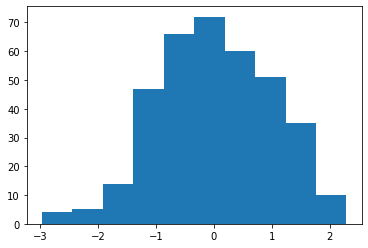

In [41]:
# 2nd assumption : the residual of the 2 samples are normally distributed
difference = scale(np.array(sam01['cnt']) - np.array(sam02['cnt']))
plt.hist(difference)

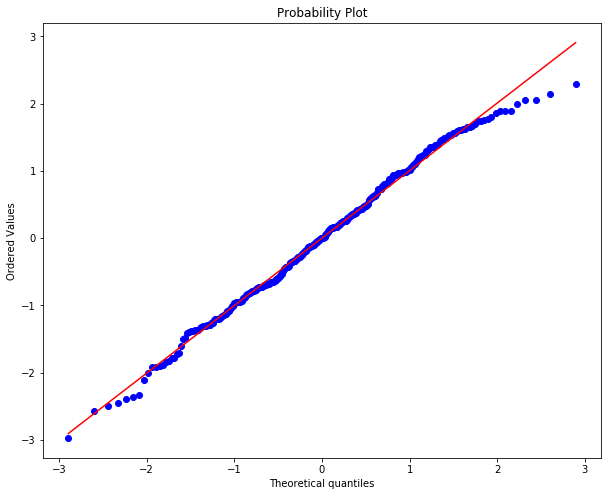

In [42]:
plt.figure(figsize=(10,8)) # probability plot or qq plot
stats.probplot(difference,plot=plt,dist='norm')
plt.show()
# calculate the difference and standardize the results around mean and express them in terms of standard deviation

In [43]:
stats.shapiro(difference)

(0.9931166172027588, 0.09432980418205261)

In [44]:
# independent t-test
stats.ttest_ind(sam01['cnt'],sam02['cnt'])

# p-value way less than threshold => num of bikes shared on hot day is diferent than cold days
# mean is significantly different

Ttest_indResult(statistic=18.872834348754502, pvalue=6.027495760064496e-65)

In [49]:
# Welch's T-test : works with different sample size and different variance
descri, res = rp.ttest(sam01['cnt'],sam02['cnt'],equal_variances=False)

In [50]:
descri

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5609.453297,1477.848434,77.460305,5457.126008,5761.780586
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4498.559066,1937.691334,71.815619,4357.568314,4639.549818


In [51]:
res
# implies num of bike shared on cooler or hotter day has significant impact

,Welch's t-test,results
0,Difference (cnt - cnt) =,2221.7885
1,Degrees of freedom =,713.1712
2,t =,18.8728
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.3989
7,Hedge's g =,1.3975
8,Glass's delta =,1.5034
9,r =,0.5771


## Paired Difference T-test

In [52]:
bp_read = pd.read_excel("bp_data.xlsx")

In [53]:
bp_read.sample(5)

,patient,sex,agegrp,bp_before,bp_after
85,86,Female,46-59,154,146
90,91,Female,46-59,142,145
5,6,Male,30-45,150,147
95,96,Female,46-59,140,154
83,84,Female,46-59,150,147


In [54]:
bp_read.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


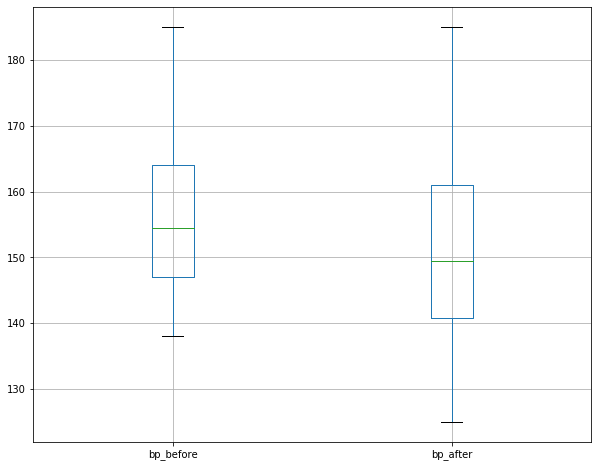

In [55]:
# check whether the readings of bp(mean) before and after the intervention is significant or not
bp_read[['bp_before','bp_after']].boxplot(figsize=(10,8))

In [56]:
# variance between these 2 groups for blood pressure reading are different
stats.levene(bp_read['bp_before'],bp_read['bp_after'])
# p-value is 2.8% levene test is significant => null hypotheis is rejected and alternative hypothesis is accepted
# variance is different across these 2 samples (paired test)
# levenes test tells us we cant use the independent ttest in order to test the means between these 2 samples (paired sample)

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [58]:
bp_read['bp_diff'] = scale(np.array(bp_read['bp_after'])-np.array(bp_read['bp_before']))
bp_read.sample(4)

,patient,sex,agegrp,bp_before,bp_after,bp_diff
51,52,Male,60+,175,160,-0.595316
105,106,Female,60+,170,143,-1.316305
16,17,Male,30-45,141,162,1.567649
4,5,Male,30-45,146,141,0.005508


(array([ 3.,  7., 17., 16., 27., 18., 23.,  3.,  4.,  2.]),
 array([-2.39778752, -1.88107908, -1.36437064, -0.8476622 , -0.33095376,
         0.18575468,  0.70246312,  1.21917156,  1.73588   ,  2.25258844,
         2.76929689]),
 <a list of 10 Patch objects>)

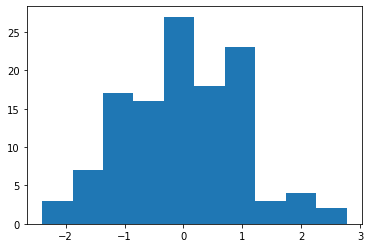

In [59]:
plt.hist(bp_read['bp_diff'])

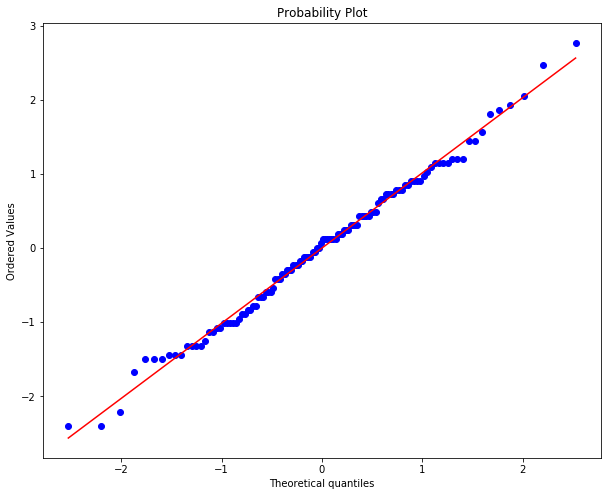

In [61]:
plt.figure(figsize=(10,8))
stats.probplot(bp_read['bp_diff'],plot=plt,dist='norm')
plt.show()

In [62]:
stats.shapiro(bp_read['bp_diff'])

(0.9926842451095581, 0.7841846942901611)

In [63]:
# paired t-test
stats.ttest_rel(bp_read['bp_after'],bp_read['bp_before'])

# p values is 0.1% intervaention is significant and below 5% threshold 
# but remeber levenes test said that variance between these 2 samples were not the same
#therefore cannot completely rely on the t-test

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [64]:
# research package comes to rescue
rp.ttest(bp_read['bp_after'],bp_read['bp_before'],paired=True,equal_variances=False)
# compares median rather than the mean values

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000
